# 二次元配列と勾配問題

機械学習においては関数の最小値を見つけることが重要になってきます。そのために使われるのが勾配降下法です。

この課題では勾配降下法を理解する準備として、NumPyを用いて関数の勾配を考えていきます。

### 【問題1】1次関数

In [1]:
import numpy as np

x = np.arange(-50, 50.1, 0.1)
y = (1/2) * x + 1

print(x, y)
print(x.shape, y.shape)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ] [-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]
(1001,) (1001,)


### 【問題2】配列の結合

In [2]:
#hstack
x_y = np.hstack((x.reshape(1001,1), y.reshape(1001,1)))
x_y.shape

(1001, 2)

In [3]:
#concatenate
x_y_v2 = np.concatenate([x.reshape(1001,1), y.reshape(1001,1)], axis=1)
x_y_v2.shape

(1001, 2)

### 【問題3】勾配を求める

各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

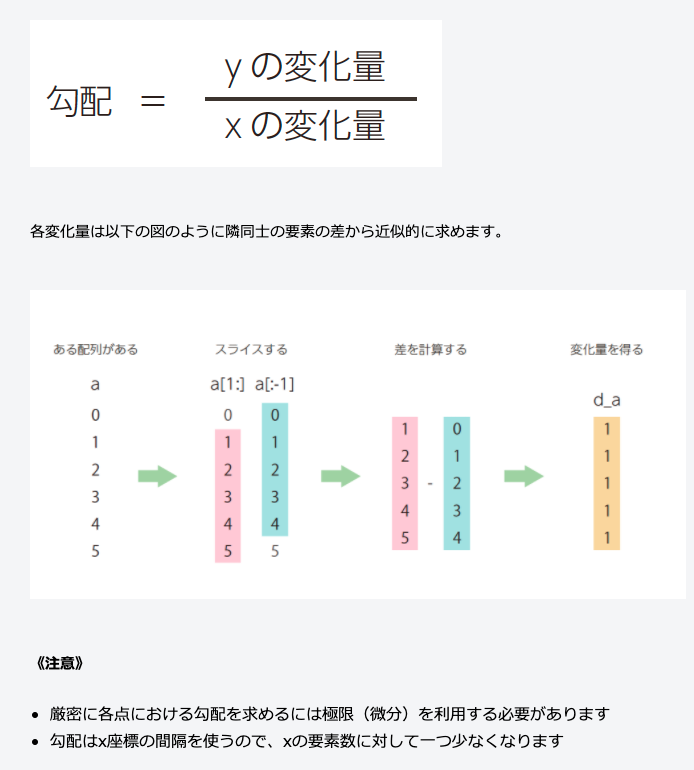

In [6]:
#Numpy slice practice

extract_x = x_y[:, 0]
extract_y = x_y[:, 1]

print(extract_x, extract_y)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ] [-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


In [7]:
# 　x_y[X, Y] -> Xはaxis=0, Yはaxis=1に作用をする。
#　そのため、x_y[:X]やx_y[X:]などは、配列の行にだけ作用を施し、列はそのままに出力される。
x_y[1:] #excluding row 0

array([[-49.9 , -23.95],
       [-49.8 , -23.9 ],
       [-49.7 , -23.85],
       ...,
       [ 49.8 ,  25.9 ],
       [ 49.9 ,  25.95],
       [ 50.  ,  26.  ]])

In [8]:
x_y[:-1] #excluding row -1

array([[-50.  , -24.  ],
       [-49.9 , -23.95],
       [-49.8 , -23.9 ],
       ...,
       [ 49.7 ,  25.85],
       [ 49.8 ,  25.9 ],
       [ 49.9 ,  25.95]])

In [9]:
#Difference
change_xy = x_y[1:] - x_y[:-1]
change_xy

array([[0.1 , 0.05],
       [0.1 , 0.05],
       [0.1 , 0.05],
       ...,
       [0.1 , 0.05],
       [0.1 , 0.05],
       [0.1 , 0.05]])

In [10]:
y_change = change_xy[0:, 1] #no need to incl zero -> change_xy[:, 1]
x_change = change_xy[0:, 0]

slope = y_change / x_change
print(slope)
slope.shape

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

(1000,)

上記の答えは妥当か？

以下の式を微分した場合どうなるのか考えてみると、1/2が定数として残ることが見えてくる。

y = (1/2) * x + 1

y' = 1/2

(1000,)


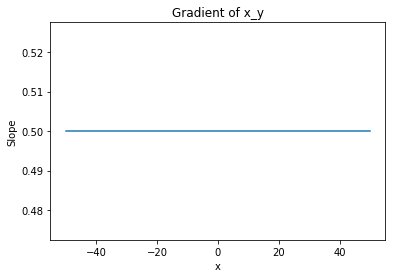

In [12]:
import matplotlib.pyplot as plt

x_updated = np.delete(x, -50)
print(x_updated.shape)


plt.title("Gradient of x_y")
plt.xlabel("x")
plt.ylabel("Slope")
plt.plot(x_updated, slope)
plt.show()


### 【問題5】Pythonの関数化



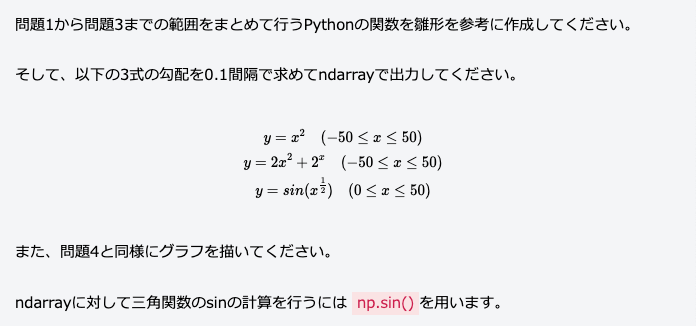

In [32]:
#まずは、一つの式を関数として落とし込む

x_1 = np.arange(-50, 50.1, 0.1)
x_2 = np.arange(-50, 50.1, 0.1)
x_3 = np.arange(0, 51, 0.1)

def gradient_function(x_array):
    y_array = x_array**2
    x_y_array = np.hstack((x_array.reshape(len(x_array), 1), y_array.reshape(len(y_array), 1)))
    print(x_y_array)
    change_xy_array = x_y_array[1:] - x_y_array[:-1]
    change_y_func = change_xy_array[:, 1]
    change_x_func = change_xy_array[:, 0]
    slope_func = (change_y_func / change_x_func)
    return slope_func

result = gradient_function(x_1)
result.shape


[[ -50.   2500.  ]
 [ -49.9  2490.01]
 [ -49.8  2480.04]
 ...
 [  49.8  2480.04]
 [  49.9  2490.01]
 [  50.   2500.  ]]


(1000,)

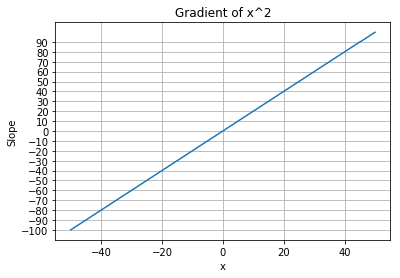

<Figure size 1440x720 with 0 Axes>

In [48]:
#一つ目の式の出力が妥当なのか確認
x_1_new = np.delete(x_1, -50)

plt.title("Gradient of x^2")
plt.xlabel("x")
plt.ylabel("Slope")
plt.plot(x_1_new, result)
plt.yticks(np.arange(min(result), max(result), 10))
plt.grid()
plt.figure(figsize=(20,10)) 
plt.show()

#y_change = 40-0
#x_change = 20-0
#slope = 2

In [81]:
#Naming Issue - HELP
x_1 = np.arange(-50, 50.1, 0.1)
x_2 = np.arange(-50, 50.1, 0.1)
x_3 = np.arange(0, 50.1, 0.1)

def multi_gradient_function(function, x_all):
    y_all = function
    x_y_all = np.hstack((x_all.reshape(len(x_all), 1), y_all.reshape(len(y_all), 1)))
    #print(x_y_all.shape)
    change_xy_all = x_y_all[1:] - x_y_all[:-1]
    change_y_all = change_xy_all[:, 1]
    change_x_all = change_xy_all[:, 0]
    slope_all = change_y_all / change_x_all
    #print(slope.shape)
    return x_y_all, slope_all

def function_1(x):
    y = x**2
    return y

def function_2(x):
    y = 2*x**2 + 2**x
    return y

def function_3(x):
    y = np.sin(x**(1/2))
    return y

'''
function1 = function_1(x_1)
function2 = function_2(x_2)
function3 = function_3(x_3)
'''

array_xy1, gradient1 = multi_gradient_function(function_1(x_1), x_1)
array_xy2, gradient2 = multi_gradient_function(function_2(x_2), x_2)
array_xy3, gradient3 = multi_gradient_function(function_3(x_3), x_3)

print(gradient1.shape)


(1000,)


In [75]:
x_axis1 = np.delete(x_1, 51)
x_axis2 = np.delete(x_3, 51)

print(x_axis1.shape, x_axis2.shape)

(1000,) (500,)


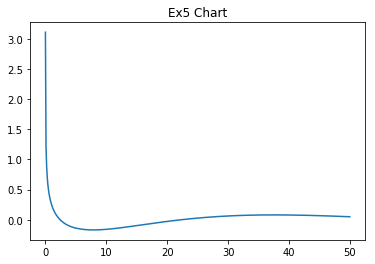

In [84]:
plt.title("Ex5 Chart")
#plt.plot(x_axis1, gradient1)
#plt.plot(x_axis1, gradient2)
plt.plot(x_axis2, gradient3)
plt.show()

### 【問題6】最小値を求める

問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。


今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。

また、最小のyをとる前後の勾配を表示してください。

In [96]:
def multi_min_argmin_function(function, x_all):
    y_all = function
    x_y_all = np.hstack((x_all.reshape(len(x_all), 1), y_all.reshape(len(y_all), 1)))
    min_val = y_all.min()
    argmin_val = y_all.argmin()
    change_xy_all = x_y_all[1:] - x_y_all[:-1]
    change_y_all = change_xy_all[:, 1]
    change_x_all = change_xy_all[:, 0]
    slope_all = change_y_all / change_x_all
    min_y_slope = slope_all[argmin_val]
    min_yadd1_slope = slope_all[(argmin_val+1)]
    min_yminus1_slope = slope_all[(argmin_val-1)]
    return min_y_slope, min_yadd1_slope, min_yminus1_slope

min_y_slope, min_yadd1_slope, min_yminus1_slope = multi_min_argmin_function(function_1(x_1), x_1)
print(min_yminus1_slope, min_y_slope, min_yadd1_slope)

-0.09999999999858034 0.1000000000014225 0.30000000000142535
